In [23]:
#task 3
#CUSTOMER CHURN PREDICTION

In [27]:
# STEP 1: Import Libraries
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns


In [28]:
# STEP 2: Load Dataset
data = pd.read_csv(r"C:\Users\Lenovo\Downloads\CUSTOMERCHURNPREDICTION\Churn_Modelling.csv")
data.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [29]:
# STEP 3: Remove Unnecessary Columns
data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)


In [30]:
# STEP 4: Encode Categorical Features (Label Encoding)
le = LabelEncoder()

data['Gender'] = le.fit_transform(data['Gender'])
data['Geography'] = le.fit_transform(data['Geography'])


In [31]:
# STEP 5: Split Features & Target
X = data.drop('Exited', axis=1)
y = data['Exited']


In [32]:
# STEP 6: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0
)


In [33]:
# STEP 7: Feature Scaling (Min-Max Scaling)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [34]:
# STEP 8: Train Decision Tree Model
dt_model = DecisionTreeClassifier(
    max_depth=6,
    min_samples_split=40,
    random_state=0
)

dt_model.fit(X_train, y_train)


,criterion,'gini'
,splitter,'best'
,max_depth,6
,min_samples_split,40
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [35]:
# STEP 9: Model Evaluation
y_pred = dt_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8636

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.97      0.92      1991
           1       0.80      0.44      0.57       509

    accuracy                           0.86      2500
   macro avg       0.83      0.71      0.74      2500
weighted avg       0.86      0.86      0.85      2500



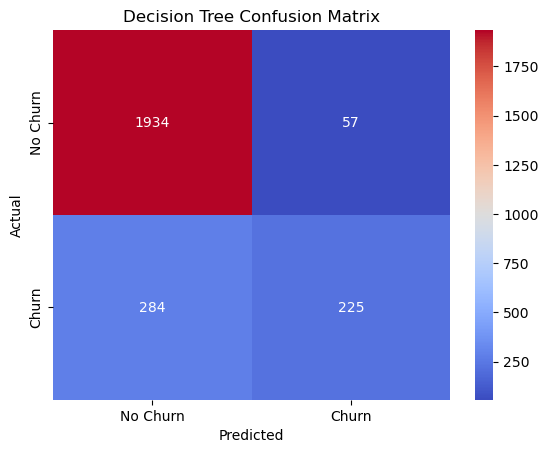

In [36]:
# STEP 10: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm',
            xticklabels=['No Churn','Churn'],
            yticklabels=['No Churn','Churn'])
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [37]:
# STEP 11: Feature Importance
importance = pd.DataFrame({
    'Feature': data.drop('Exited', axis=1).columns,
    'Score': dt_model.feature_importances_
}).sort_values(by='Score', ascending=False)

importance.head(8)


,Feature,Score
3,Age,0.438746
6,NumOfProducts,0.322546
8,IsActiveMember,0.132126
5,Balance,0.049475
1,Geography,0.042882
9,EstimatedSalary,0.008286
2,Gender,0.003134
0,CreditScore,0.002806


In [38]:
#Task 3 Report 

In [ ]:
# Customer Churn Prediction  
### CodeSoft Machine Learning Task

## Introduction
Customer Churn Prediction is a supervised machine learning task that identifies customers who are likely to leave a bank or service.
    Predicting churn helps organizations take proactive actions to retain customers.

## Objective
- To predict whether a customer will exit the bank  
- To analyze customer behavior using demographic and financial features  
- To build and evaluate a machine learning classification model  

## Dataset Description
The dataset contains customer details such as:
- Credit Score, Age, Balance, Salary  
- Geography and Gender  
- Number of products, activity status  
- **Exited** (Target variable)

## Methodology
1. Load and clean the dataset  
2. Encode categorical features  
3. Scale numerical data  
4. Split data into training and testing sets  
5. Train a Decision Tree classifier  
6. Evaluate the model performance  

## Model Used
A **Decision Tree Classifier** is used because it is simple, interpretable, and effective for classification tasks involving structured data.

## Evaluation
The model performance is evaluated using:
- Accuracy score  
- Classification report  
- Confusion matrix  

## Result
The model successfully predicts customer churn with good accuracy and identifies key features influencing customer exit behavior.

## Conclusion
This project demonstrates how machine learning can be used to predict customer churn effectively. The model helps understand customer patterns
and supports better decision-making.

## Future Scope
- Use ensemble models like Random Forest or XGBoost  
- Perform hyperparameter tuning  
- Deploy the model using a web interface  
